## Importing Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('/Users/ghanishtaggarwal/Downloads/shopifysummer.csv')

## EDA to create a fundamental understanding of the data

In [18]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [20]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [21]:
df.shape

(5000, 7)

In [22]:
missing_df=pd.DataFrame()
missing_df['cols']=df.isnull().sum().keys()
missing_df['values']=df.isnull().sum().values.tolist()
missing_df[missing_df['values']>0]

,cols,values


# Section 1: Reducing items to 1 item purchased

In [23]:
df1 = df[['shop_id','order_amount','total_items']]

### Column helps us understand the amount of money spent if each consumer bought only one product

In [24]:
df1['single_order_value'] = df1['order_amount'] / df1['total_items']

/Users/ghanishtaggarwal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Computing the average value of the data

In [26]:
df1['single_order_value'].mean()

387.7428

### Now after computing the average value of the dataset, the value in front of us still isn't satisfactory. For this we need to dive deeper into grouping the amount according to the shop_id 

In [27]:
df1.groupby(df1['shop_id'])['single_order_value'].mean().reset_index().sort_values(by=['single_order_value'], ascending = False).head()

,shop_id,single_order_value
77,78,25725.0
41,42,352.0
11,12,201.0
88,89,196.0
98,99,195.0


### As we can clearly see that the shop_id is over charging their customers

In [28]:
df1[df1['shop_id'] != 78]['single_order_value'].mean()

152.47557529269278

### At last, we can obeserve a satisfactory value, making the show an affordable purchase across 99 stores

In [29]:
df2 =  df[['shop_id','order_amount','total_items']]

#### While going throught the next section, we will remember that we have already found shop_id 78 to be an anomaly. Furthermore, we will be investigating order_amount and total_items 

In [32]:
df2['order_amount'].value_counts()

153    87
306    85
354    82
312    75
156    75
       ..
404     1
948     1
920     1
816     1
980     1
Name: order_amount, Length: 258, dtype: int64

# Section 2: Anomoly removal and re-evaluation

In [33]:
df2['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

### Oberserving the total_items, we can see an outlier of 2000 items. This needs to investigated further as to which shop_id is selling them

In [34]:
df2[df2['total_items'] == 2000]['shop_id'].unique()

array([42])

#### Now, is shop_id 42 a problem or a specific customer?

In [36]:
df2 = df[['shop_id','user_id','order_amount','total_items']]
df2[df2['shop_id'] == 42].head()

,shop_id,user_id,order_amount,total_items
15,42,607,704000,2000
40,42,793,352,1
60,42,607,704000,2000
308,42,770,352,1
409,42,904,704,2


In [37]:
df2[df2['user_id'] == 607].head()

,shop_id,user_id,order_amount,total_items
15,42,607,704000,2000
60,42,607,704000,2000
520,42,607,704000,2000
1104,42,607,704000,2000
1362,42,607,704000,2000


From the above we can not really conclusively say if it is the shop's problem or the customer is driving these sales as there can be no control over the consumer spending, thus removing them will be ideal answer 

### Removing both shop_id 42 and 78

In [38]:
df_final = df[(df['shop_id'] != 42) & (df['shop_id'] != 78)]

In [39]:
df_final['order_amount'].mean()

300.1558229655313

## At last we can conclude that each average order comes out to be roughly $300 which also includes customers buying more than one prduct at a time

In [40]:
df_final['total_items'].mean()

1.9957169080155006

# Section 3 : Re-engineer and use new metrics

In [41]:
df3 = df.copy()

In [42]:
df3['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

### We can observe the following from above
* The mean is high and has been observed before
* The Standard Deviation is too high indicating large differences
* 3rd Quartile is almost accurate

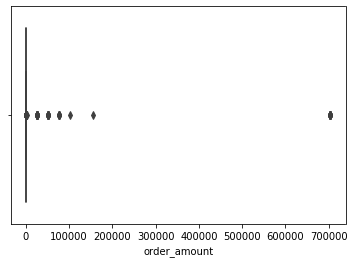

In [43]:
sns.boxplot(df3['order_amount'])

#### From the above Box-plot it is evident that there are outliers but does not show values due to anolmalies

In [44]:
mean = df3['order_amount'].mean()
std = df3['order_amount'].std()

In [45]:
df3['z_score'] = (df3['order_amount'] - mean) / std
df3.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,z_score
0,1,53,746,224,2,cash,2017-03-13 12:36:56,-0.070759
1,2,92,925,90,1,cash,2017-03-03 17:38:52,-0.074005
2,3,44,861,144,1,cash,2017-03-14 4:23:56,-0.072697
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,-0.072407
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,-0.072407


### The initial z-score looks accurate, let's see the ones that are slighly further from the mean

In [46]:
df3[df3['z_score'] > 0.1].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,z_score
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,16.977029
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,16.977029
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,0.546959
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,1.170104
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,1.170104


### We observed back in section 1 and section 2 that shops 78 and 42 were causing us issues. Let's see if this applies for z-score of above 0.1

In [47]:
df3[abs(df3['z_score']) > 0.1]['shop_id'].unique()

array([42, 78])

Once again, we see that 78 and 42 have anomalous behaviour. However, we now have an interpretation of the whole dataset using .describe() and an observation of each independent order using z-score. We can use both these metrics for different use cases.